In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['axes.facecolor'] = 'white'
%matplotlib inline
figsize(12.5, 4)

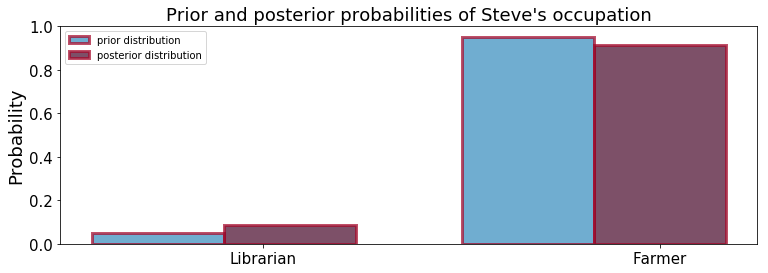

In [2]:
fig = plt.figure()
fig.patch.set_facecolor('white')

colors = ["#348ABD", "#460628"]
prior = [1 / 21., 20. / 21.]
posterior = [0.087, 1 - 0.087]
plt.bar([0, 0.7], prior, alpha=0.70, width=0.25,
        color=colors[0], label="prior distribution", lw=3, edgecolor="#A60628")

plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7, width=0.25, color=colors[1],
        label="posterior distribution", lw=3, edgecolor="#A60628")

plt.xticks([0.20, 0.95], ["Librarian", "Farmer"], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Probability", fontsize=18)
plt.legend(loc="upper left")
plt.title("Prior and posterior probabilities of Steve's occupation", fontsize=18)

plt.show()

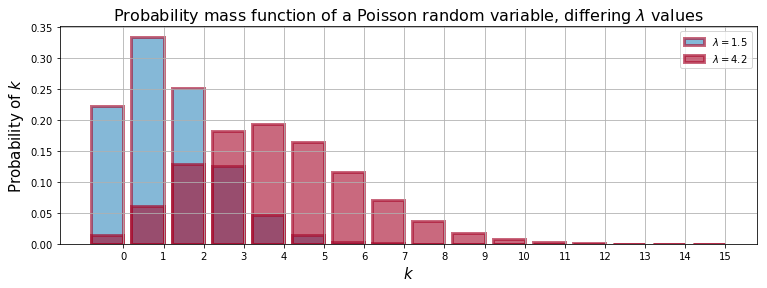

In [4]:
import scipy.stats as stats
figsize(12.5, 4)
fig = plt.figure()
fig.patch.set_facecolor('white')

poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ["#348ABD", "#A60628"]

a = np.arange(16)
plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
        label="$\lambda = %.1f$" % lambda_[0],
        alpha=0.60, edgecolor=colors[1], lw=3)

plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
        label="$\lambda = %.1f$" % lambda_[1],
        alpha=0.60, edgecolor=colors[1], lw=3)

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probability of $k$", fontsize=15)
plt.xlabel("$k$",  fontsize=15)
plt.title("Probability mass function of a Poisson random variable, "
          "differing $\lambda$ values", fontsize=16)
plt.grid()
plt.show()

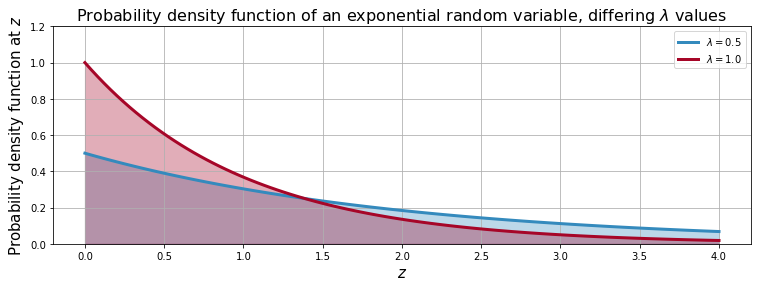

In [5]:
fig = plt.figure(facecolor='w')

a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1. / l),
             lw=3, color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l),
                     color=c, alpha=.33)
    
plt.legend()
plt.ylabel("Probability density function at $z$", fontsize=15)
plt.xlabel("$z$", fontsize=15)
plt.ylim(0, 1.2)
plt.title("Probability density function of an exponential "
          "random variable, differing $\lambda$ values", fontsize=16)

plt.grid()
plt.show()

In [6]:
from os import makedirs
makedirs("data", exist_ok=True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

('data/txtdata.csv', <http.client.HTTPMessage at 0x11a681ac8>)

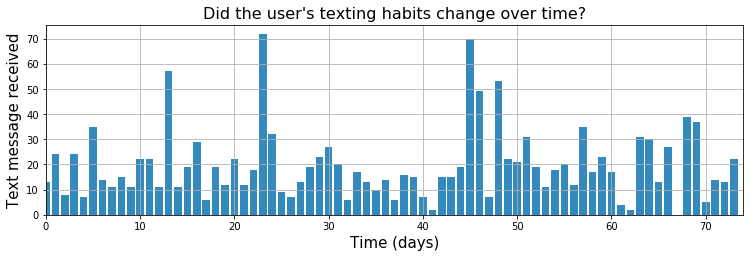

In [7]:
fig = plt.figure(figsize=(12.5, 3.5), facecolor='w')

count_data = np.loadtxt('data/txtdata.csv')
n_cound_data = len(count_data)
plt.bar(np.arange(n_cound_data), count_data, color="#348ABD")

plt.xlabel("Time (days)", fontsize=15)
plt.ylabel("Text message received", fontsize=15)
plt.title("Did the user's texting habits change over time?", fontsize=16)
plt.xlim(0, n_cound_data)
plt.grid()
plt.show()

In [8]:
import pymc as pm

alpha = 1.0 / count_data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

In [13]:
import pymc3 as pm
from pymc3 import Exponential

alpha = 1.0 / count_data.mean()

lambda_1 = Exponential('lambda_1', alpha, testval=5.)

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [10]:
alpha

0.05065023956194388

In [17]:
from pymc3 import Exponential, Deterministic, Model, sample, NUTS, find_MAP, traceplot

with Model() as sp500_model:
    nu = Exponential('nu', 1./10, testval=5.)